# IDP-o comparison with Calvados gyration radius

```
# Copyright 2025 Peptone Ltd
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
```

In [1]:
from glob import glob

import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np
import pandas as pd
from tqdm import tqdm


In [2]:
# set bigger font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIG_SIZE = 16

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIG_SIZE)  # fontsize of the figure title

In [3]:
calvados_df = pd.read_csv(
    "https://raw.githubusercontent.com/KULL-Centre/_2023_Tesei_IDRome/refs/heads/main/IDRome_DB.csv",
)
calvados_df

,seq_name,UniProt_ID,N,nu,SPR,ete2_Rg2,S,Delta,Rg/nm,Ree/nm,...,gene_name,QCDpred,z_delta_+-,z_omega_pi,z_omega_+,z_omega_-,z_omega_h,fdomain,nu_svr,SPR_svr
0,A0A024RBG1_145_181,A0A024RBG1,37,0.558,10.284649,6.305058,0.933961,0.225950,1.606731,3.845104,...,NUDT4B,0.254463,0.000000,0.000000,0.000000,0.000000,-0.531910,0.000000,0.565,10.288
1,A0A075B6T7_1_32,A0A075B6T7,32,0.525,10.092351,6.104512,0.901807,0.212670,1.447131,3.385064,...,TRAV6,0.659342,0.000000,0.054230,-0.043142,0.000000,0.061436,0.000000,0.532,10.107
2,A0A087WTH1_1_67,A0A087WTH1,67,0.532,10.160125,6.084799,0.822738,0.199126,2.246105,5.295387,...,TMEM265,0.661272,-1.094918,0.000000,0.384885,2.281943,1.092688,0.298507,0.537,10.167
3,A0A087WTH5_1_132,A0A087WTH5,132,0.496,10.049124,6.147291,0.798438,0.188978,3.038320,7.131916,...,KCNE1B,0.445861,0.000000,-0.463316,0.799692,0.000000,0.627563,0.000000,0.509,10.018
4,A0A087WV53_1_46,A0A087WV53,46,0.567,10.212765,6.441026,0.882210,0.214786,1.880940,4.603256,...,SPEGNB,0.313998,0.000000,0.000000,1.947253,0.000000,0.090132,0.369565,0.578,10.316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28053,Q9Y6Z4_1_181,Q9Y6Z4,181,0.493,10.006512,5.736551,0.799905,0.210890,3.790272,8.597289,...,KIF25-AS1,0.396007,0.000000,0.000000,-1.319891,0.000000,0.163169,0.000000,0.520,9.993
28054,Q9Y6Z5_1_254,Q9Y6Z5,254,0.528,9.830710,6.156716,0.896173,0.221422,4.586494,10.810353,...,AFDN-DT,0.374082,0.000000,0.000000,-2.182869,0.000000,2.214949,0.000000,0.537,9.984
28055,Q9Y6Z7_1_109,Q9Y6Z7,109,0.546,10.025622,6.177384,0.935857,0.216970,3.012739,7.121029,...,COLEC10,0.232155,0.106768,0.000000,0.451957,2.132808,1.114749,0.513761,0.513,10.072
28056,W6CW81_1_113,W6CW81,113,0.519,10.084249,6.192783,0.843169,0.193880,2.943975,6.978634,...,PYDC5,0.310500,0.404828,0.000000,0.554013,2.234693,-1.942090,0.451327,0.512,10.063


In [4]:
idromeo_dir = "../datasets/IDRome-o/ensembles/"

trj_names = [f.removeprefix(idromeo_dir).removesuffix(".xtc") for f in sorted(glob(idromeo_dir + "*.xtc"))]
print(f"Found {len(trj_names):_} ensembles")
rg_ref = np.zeros(len(trj_names))
rg_our = np.zeros((len(trj_names), 100))
seq_len = np.zeros(len(trj_names))
for i, name in enumerate(tqdm(trj_names)):
    rg_our[i] = md.compute_rg(md.load(idromeo_dir + name + ".xtc", top=idromeo_dir + name + ".pdb"))
    assert len(calvados_df[calvados_df["seq_name"] == name]) == 1
    seq_len[i], rg_ref[i] = calvados_df[calvados_df["seq_name"] == name][["N", "Rg/nm"]].to_numpy()[0]

Found 22_399 ensembles


100%|██████████| 22399/22399 [15:09<00:00, 24.63it/s]


un-reweightable Rgs: 96 out of 22_399, 0.43%


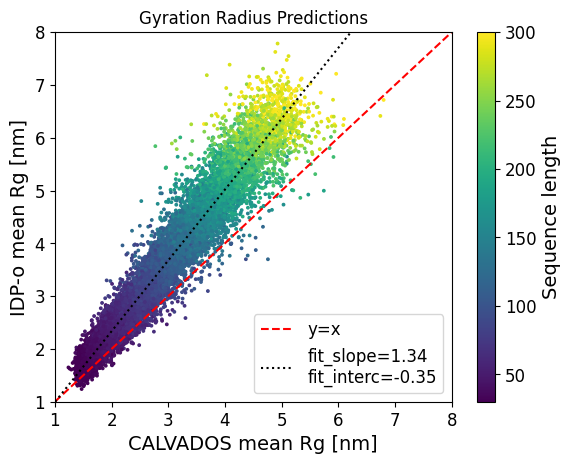

In [5]:
from scipy.stats import linregress


unreweightable = (rg_ref < rg_our.min(axis=1)) | (rg_ref > rg_our.max(axis=1))
print(f"un-reweightable Rgs: {sum(unreweightable):_} out of {len(rg_ref):_}, {sum(unreweightable) / len(rg_ref):.2%}")

plt.title("Gyration Radius Predictions")
plt.scatter(rg_ref, rg_our.mean(axis=1), c=seq_len, s=3, rasterized=True)
plt.colorbar(label="Sequence length")
plt.axline([2, 2], [3, 3], color="r", ls="--", label="y=x")
fit_line = linregress(rg_ref, rg_our.mean(axis=1))
plt.axline(
    [2, fit_line.intercept + fit_line.slope * 2],
    slope=fit_line.slope,
    color="k",
    ls=":",
    label=f"fit_slope={fit_line.slope:.2f}\nfit_interc={fit_line.intercept:.2f}",
)
plt.xlabel("CALVADOS mean Rg [nm]")
plt.ylabel("IDP-o mean Rg [nm]")
plt.legend()
lims = np.floor(min(rg_ref.min(), rg_our.mean(axis=1).min())), np.ceil(max(rg_ref.max(), rg_our.mean(axis=1).max()))
plt.xlim(*lims)
plt.ylim(*lims)
plt.savefig("idp-o_rg_comparison.pdf", dpi=300, bbox_inches="tight")
plt.show()